In [2]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
data = pd.read_csv('Train.csv', index_col='ID')
df = pd.DataFrame(data)

# 0 = Yes, 1 = No
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('str')
df.loc[df['Reached.on.Time_Y.N'] == '0', 'Reached.on.Time_Y.N'] = 'YES'
df.loc[df['Reached.on.Time_Y.N'] == '1', 'Reached.on.Time_Y.N'] = 'NO'

df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,NO
2,F,Flight,4,5,216,2,low,M,59,3088,NO
3,A,Flight,2,2,183,4,low,M,48,3374,NO
4,B,Flight,3,3,176,4,medium,M,10,1177,NO
5,C,Flight,2,2,184,3,medium,F,46,2484,NO


In [4]:
corr_df = df.copy()

# F = 1, M = 0
corr_df['Gender'] = (corr_df['Gender'] == 'F').astype('int64')

# 0 = low, 1 = medium, 2 = high
corr_df.loc[corr_df['Product_importance'] == 'low', 'Product_importance'] = 0
corr_df.loc[corr_df['Product_importance'] == 'medium', 'Product_importance'] = 1
corr_df.loc[corr_df['Product_importance'] == 'high', 'Product_importance'] = 2
corr_df['Product_importance'] = corr_df['Product_importance'].astype('int64')

# 0 = Flight, 1 = Road, 2 = Ship
corr_df['Mode_of_Shipment'] = corr_df['Mode_of_Shipment'].astype('category')
corr_df['Mode_of_Shipment'] = corr_df['Mode_of_Shipment'].cat.codes

# 3 = D, 4 = F, 0 = A, 1 = B, C = 2
corr_df['Warehouse_block'] = corr_df['Warehouse_block'].astype('category')
corr_df['Warehouse_block'] = corr_df['Warehouse_block'].cat.codes

# 0 = Yes, 1 = No
corr_df.loc[corr_df['Reached.on.Time_Y.N'] == 'YES', 'Reached.on.Time_Y.N'] = '0'
corr_df.loc[corr_df['Reached.on.Time_Y.N'] == 'NO', 'Reached.on.Time_Y.N'] = '1'
corr_df['Reached.on.Time_Y.N'] = corr_df['Reached.on.Time_Y.N'].astype('int64')

In [5]:
corr_df.info()
corr_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int8 
 1   Mode_of_Shipment     10999 non-null  int8 
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int64
 7   Gender               10999 non-null  int64
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(9), int8(2)
memory usage: 880.8 KB


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,3,0,4,2,177,3,0,1,44,1233,1
2,4,0,4,5,216,2,0,0,59,3088,1
3,0,0,2,2,183,4,0,0,48,3374,1
4,1,0,3,3,176,4,1,0,10,1177,1
5,2,0,2,2,184,3,1,1,46,2484,1


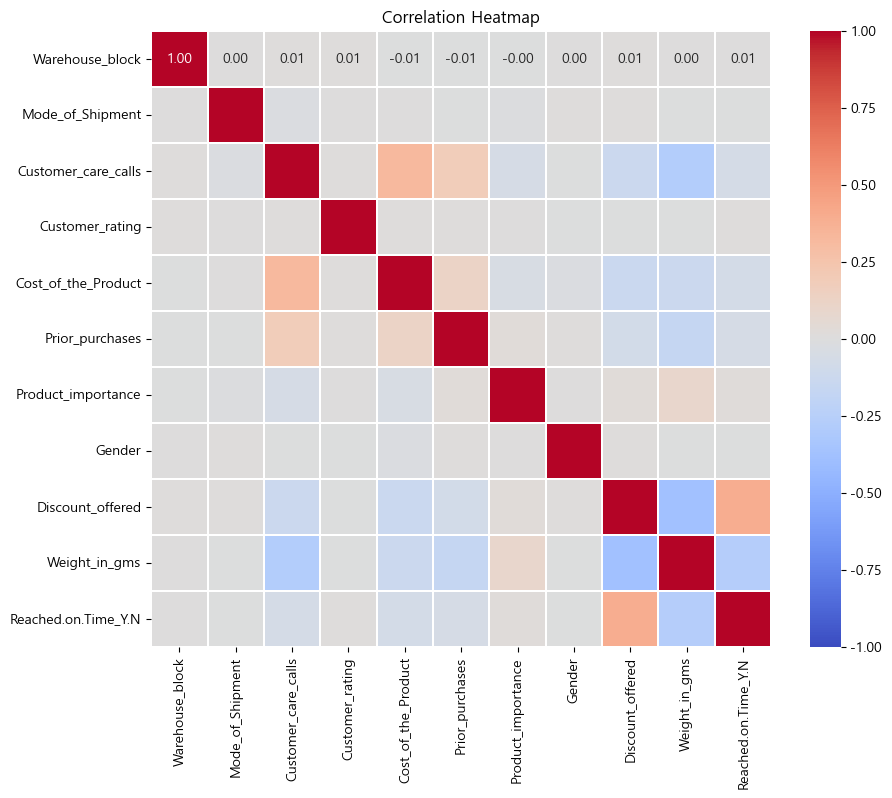

In [6]:
correlation_matrix = corr_df.corr()

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True, # 상관계수 표시
            fmt='.2f', # 상관계수 소수점 자리
            cmap='coolwarm', # 컬러맵 색상 팔레트 
            vmax=1.0, # 상관계수 최댓값 
            vmin=-1.0, # 상관계수 최솟값
            linecolor='white', # 셀 테두리 색상 
            linewidths=.05)
plt.title('Correlation Heatmap')
plt.show()


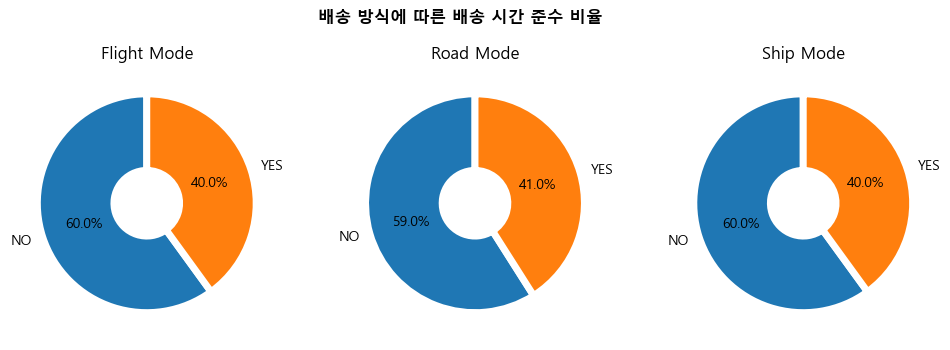

In [7]:
# 각 배송 방식 및 제품 배송 시간에 대한 빈도를 계산
df_ship = df.groupby(['Mode_of_Shipment']).size().reset_index(name='Count')
df_ship_time = df.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().reset_index(name='Count')

ship_count = list(df_ship['Count'])
time_count = list(df_ship_time['Count'])
rate_data = []

for i in range(len(time_count)):
    rate_data.append(round(time_count[i]/ship_count[i//2], 2))

df_ship_time.insert(3, 'Rate', rate_data)
df_ship_time

# 'Mode_of_Shipment' 및 'Reached.on.Time_Y.N' 열을 문자열로 변환
df_ship_time['Mode_of_Shipment'] = df_ship_time['Mode_of_Shipment'].astype(str)
df_ship_time['Reached.on.Time_Y.N'] = df_ship_time['Reached.on.Time_Y.N'].astype(str)

labels = list(df_ship_time['Reached.on.Time_Y.N'][:2])
        
explode = [0.1, 0.1]
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}

# countplot으로 시각화
plt.figure(figsize=(12, 4))
plt.suptitle('배송 방식에 따른 배송 시간 준수 비율', fontweight='bold')

plt.subplot(1,3,1)
plt.title('Flight Mode')
plt.pie(df_ship_time[df_ship_time['Mode_of_Shipment']=='Flight']['Rate'], labels=labels, autopct='%.1f%%', wedgeprops=wedgeprops, startangle=90)

plt.subplot(1,3,2)
plt.title('Road Mode')
plt.pie(df_ship_time[df_ship_time['Mode_of_Shipment']=='Road']['Rate'], labels=labels, autopct='%.1f%%', wedgeprops=wedgeprops, startangle=90)

plt.subplot(1,3,3)
plt.title('Ship Mode')
plt.pie(df_ship_time[df_ship_time['Mode_of_Shipment']=='Ship']['Rate'], labels=labels, autopct='%.1f%%', wedgeprops=wedgeprops, startangle=90)

plt.show()



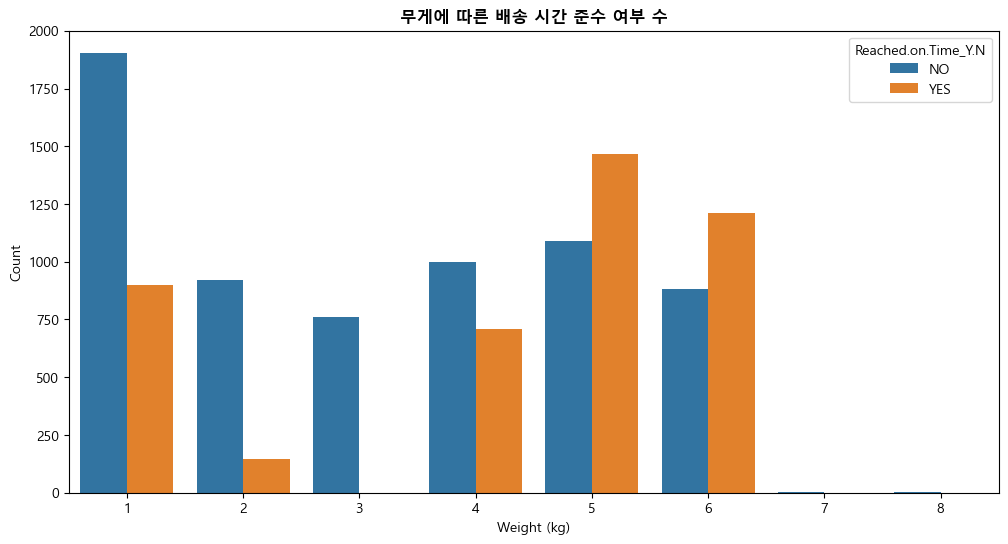

In [42]:
df_weight = df.copy()

# Weight_in_gms 값의 범주화
bins = 8
labels = [i+1 for i in range(bins)]
df_weight['Weight_in_gms'] = pd.cut(df_weight['Weight_in_gms'], bins=bins, labels=labels)

# Weight_in_gms 따른 카운트 계산
weight = df_weight.groupby(['Reached.on.Time_Y.N','Weight_in_gms'], observed=False).size().reset_index(name='Count')
weight['Weight_in_gms'] = weight['Weight_in_gms'].astype(str)
weight['Reached.on.Time_Y.N'] = weight['Reached.on.Time_Y.N'].astype(str)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=weight, x='Weight_in_gms', y='Count', hue='Reached.on.Time_Y.N')
plt.title('무게에 따른 배송 시간 준수 여부 수', fontweight='bold')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

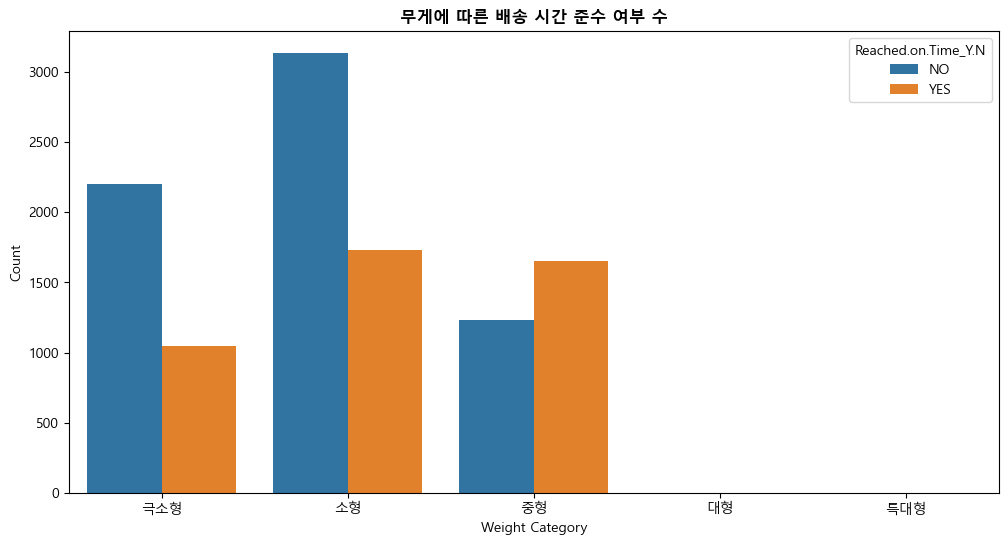

In [43]:
df_weight = df.copy()

# Weight_in_gms 값의 범주화
bins = [0,2000,5000,10000,15000,20000]
labels = ['극소형', '소형', '중형', '대형', '특대형']
df_weight['Weight_in_gms'] = pd.cut(df_weight['Weight_in_gms'], bins=bins, labels=labels)

# Weight_in_gms 따른 카운트 계산
weight = df_weight.groupby(['Reached.on.Time_Y.N','Weight_in_gms'], observed=False).size().reset_index(name='Count')
weight['Weight_in_gms'] = weight['Weight_in_gms'].astype(str)
weight['Reached.on.Time_Y.N'] = weight['Reached.on.Time_Y.N'].astype(str)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=weight, x='Weight_in_gms', y='Count', hue='Reached.on.Time_Y.N')
plt.title('무게에 따른 배송 시간 준수 여부 수', fontweight='bold')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.show()


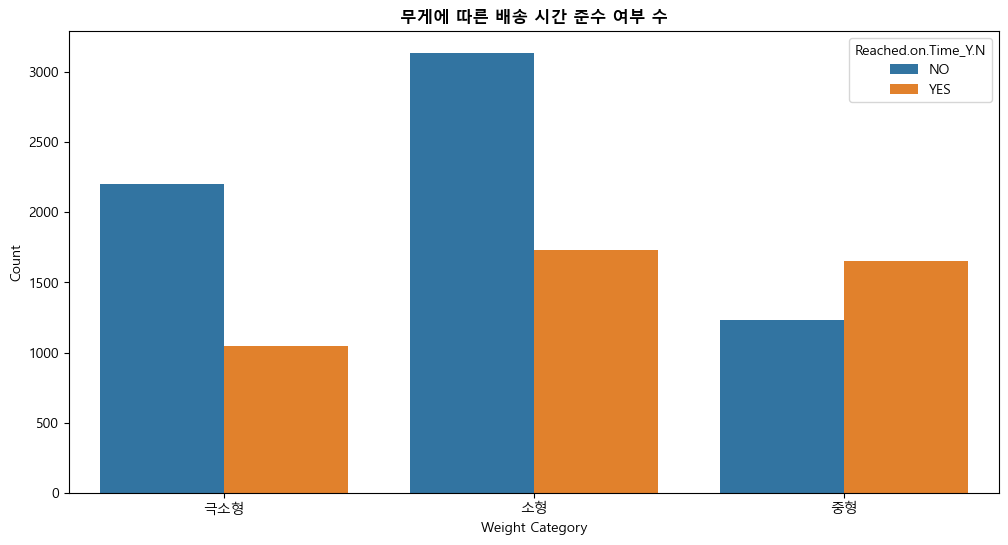

In [44]:
max_weight = df['Weight_in_gms'].max()
df_weight = df.copy()

# Weight_in_gms 값의 범주화
bins = [0,2000,5000,max_weight]
labels = ['극소형', '소형', '중형']
df_weight['Weight_in_gms'] = pd.cut(df_weight['Weight_in_gms'], bins=bins, labels=labels)

# Weight_in_gms 따른 카운트 계산
weight = df_weight.groupby(['Reached.on.Time_Y.N','Weight_in_gms'], observed=False).size().reset_index(name='Count')
weight['Weight_in_gms'] = weight['Weight_in_gms'].astype(str)
weight['Reached.on.Time_Y.N'] = weight['Reached.on.Time_Y.N'].astype(str)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=weight, x='Weight_in_gms', y='Count', hue='Reached.on.Time_Y.N')
plt.title('무게에 따른 배송 시간 준수 여부 수', fontweight='bold')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.show()


In [45]:
df_shipment = df[(df['Reached.on.Time_Y.N']==0)]
df_shipment = df_shipment.groupby('Mode_of_Shipment').size().reset_index(name='Count')

df_notime_heavy = df[(df['Reached.on.Time_Y.N']==0) & (df['Weight_in_gms']>=4050)]
notime_heavy = df_notime_heavy.groupby('Mode_of_Shipment').size().reset_index(name='Count')
insert_data = list(notime_heavy['Count'])

df_shipment.insert(2, 'notime_heavy_counts', insert_data)

rate_data = round(df_shipment['notime_heavy_counts']/df_shipment['Count'], 2) * 100
df_shipment.insert(3, 'rate', rate_data)

df_shipment


,Mode_of_Shipment,Count,notime_heavy_counts,rate


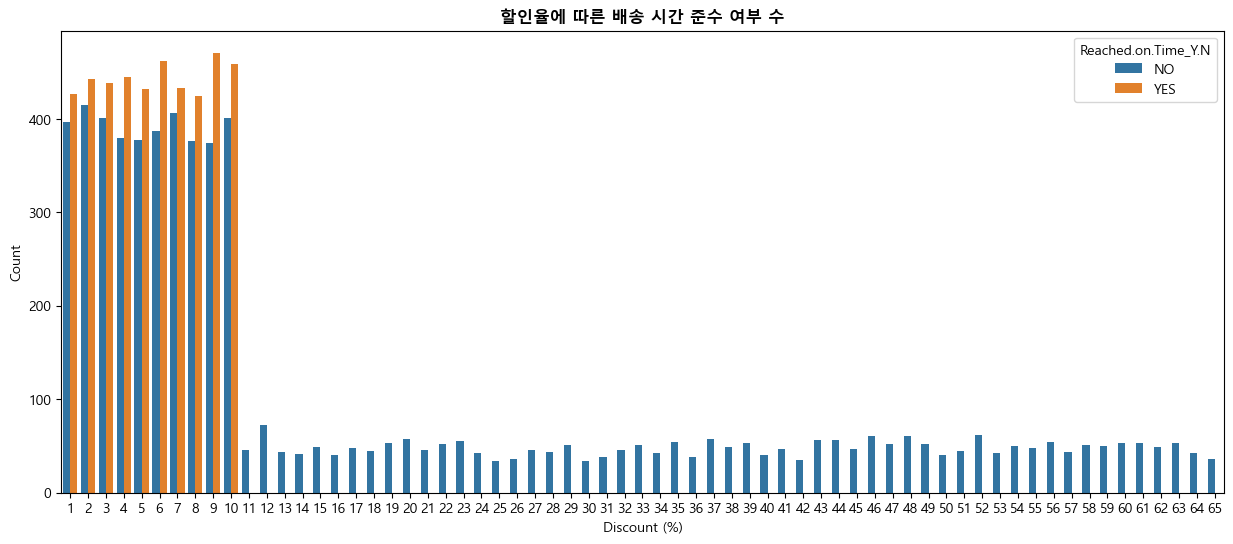

In [46]:
max_discount = df['Discount_offered'].max()
df_discount = df.copy()

# Discount_offered 값의 범주화
bins = max_discount
labels = [i+1 for i in range(bins)]
df_discount['Discount_category'] = pd.cut(df_discount['Discount_offered'], bins=bins, labels=labels)

# Discount_offered에 따른 카운트 계산
discount_count = df_discount.groupby(['Reached.on.Time_Y.N','Discount_category'], observed=False).size().reset_index(name='Count')
discount_count['Discount_category'] = discount_count['Discount_category'].astype(str)
discount_count['Reached.on.Time_Y.N'] = discount_count['Reached.on.Time_Y.N'].astype(str)

# 시각화
plt.figure(figsize=(15, 6))
sns.barplot(data=discount_count, x='Discount_category', y='Count', hue='Reached.on.Time_Y.N')
plt.title('할인율에 따른 배송 시간 준수 여부 수', fontweight='bold')
plt.xlabel('Discount (%)')
plt.ylabel('Count')
plt.show()


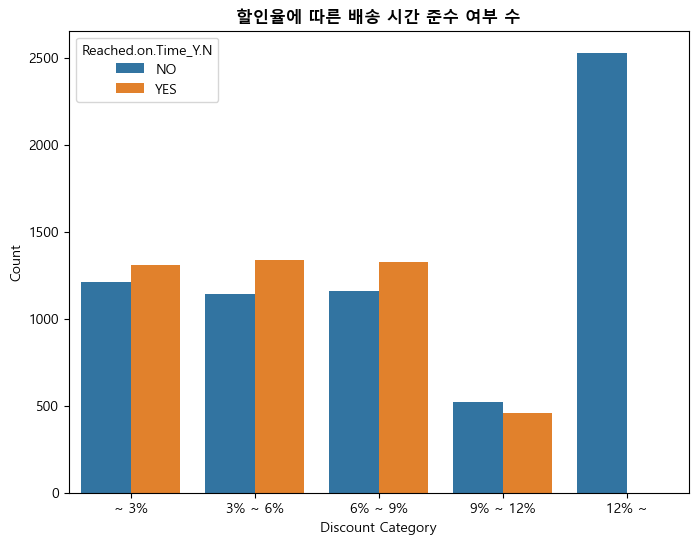

In [47]:
max_discount = df['Discount_offered'].max()
df_discount = df.copy()

# Discount_offered 값의 범주화
bins = [3*i if i!=5 else max_discount for i in range(6)]
labels = ['~ 3%', '3% ~ 6%', '6% ~ 9%', '9% ~ 12%', '12% ~']
df_discount['Discount_category'] = pd.cut(df_discount['Discount_offered'], bins=bins, labels=labels)

# Discount_offered에 따른 카운트 계산
discount_count = df_discount.groupby(['Reached.on.Time_Y.N','Discount_category'], observed=False).size().reset_index(name='Count')
discount_count['Discount_category'] = discount_count['Discount_category'].astype(str)
discount_count['Reached.on.Time_Y.N'] = discount_count['Reached.on.Time_Y.N'].astype(str)

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=discount_count, x='Discount_category', y='Count', hue='Reached.on.Time_Y.N')
plt.title('할인율에 따른 배송 시간 준수 여부 수', fontweight='bold')
plt.xlabel('Discount Category')
plt.ylabel('Count')
plt.show()


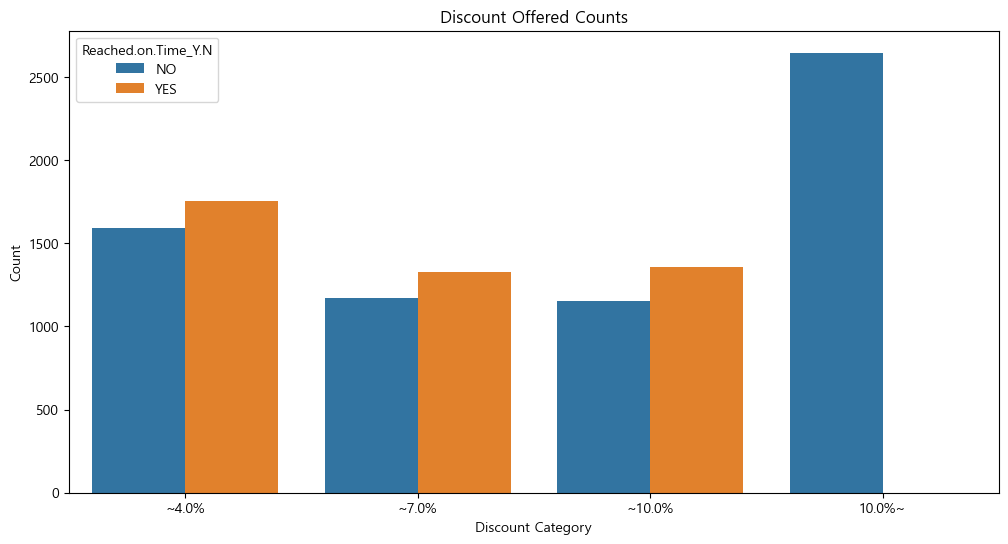

In [48]:
max_discount = df['Discount_offered'].max()
df_discount = df.copy()

# 할인율의 사분위수 구하기
dis = df_discount['Discount_offered']
q1 = dis.quantile(.25)
q2 = dis.quantile(.5)
q3 = dis.quantile(.75)
q4 = dis.quantile(1)

# Discount_offered 값의 범주화
bins = [0, q1, q2, q3, q4]
labels = ['~'+str(q1)+'%', '~'+str(q2)+'%', '~'+str(q3)+'%', str(q3)+'%'+'~']
df_discount['Discount_category'] = pd.cut(df_discount['Discount_offered'], bins=bins, labels=labels)

# Discount_offered에 따른 카운트 계산
discount_count = df_discount.groupby(['Reached.on.Time_Y.N','Discount_category'], observed=False).size().reset_index(name='Count')
discount_count['Discount_category'] = discount_count['Discount_category'].astype(str)
discount_count['Reached.on.Time_Y.N'] = discount_count['Reached.on.Time_Y.N'].astype(str)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=discount_count, x='Discount_category', y='Count', hue='Reached.on.Time_Y.N')
plt.title('Discount Offered Counts')
plt.xlabel('Discount Category')
plt.ylabel('Count')
plt.show()


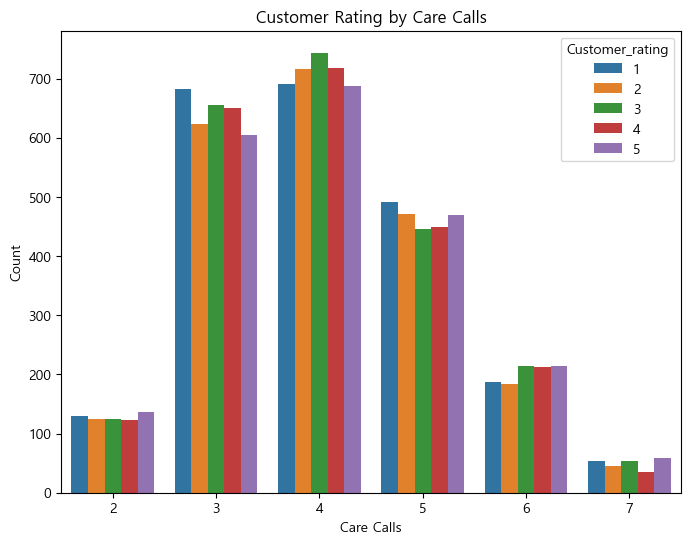

In [49]:
# 고객 전화에 따른 고객 선호도 변화
df_rating = df.groupby(['Customer_care_calls', 'Customer_rating']).size().reset_index(name='Count')

# 'Customer_care_calls' 및 'Customer_care_calls' 열을 문자열로 변환
df_rating['Customer_care_calls'] = df_rating['Customer_care_calls'].astype(str)
df_rating['Customer_rating'] = df_rating['Customer_rating'].astype(str)

# countplot으로 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=df_rating, x='Customer_care_calls', y='Count', hue='Customer_rating')
plt.title('Customer Rating by Care Calls')
plt.xlabel('Care Calls')
plt.ylabel('Count')
plt.show()


In [ ]:
max_discount = df['Discount_offered'].max()
df_discount = df.copy()

# Discount_offered 값의 범주화
bins = [-1, 0, max_discount]
labels = ['No Discount', 'Yes Discount']
df_discount['Discount_category'] = pd.cut(df_discount['Discount_offered'], bins=bins, labels=labels)

# Discount_offered에 따른 카운트 계산
discount_count = df_discount.groupby(['Reached.on.Time_Y.N','Discount_category'], observed=False).size().reset_index(name='Count')
discount_count['Discount_category'] = discount_count['Discount_category'].astype(str)
discount_count['Reached.on.Time_Y.N'] = discount_count['Reached.on.Time_Y.N'].astype(str)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=discount_count, x='Discount_category', y='Count', hue='Reached.on.Time_Y.N')
plt.title('Discount Offered Counts')
plt.xlabel('Discount Category')
plt.ylabel('Count')
plt.show()